For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

Has the network latency gone up since we switched internet service providers?
 -- Hypotheses0 Network latency has stayed the same or has gone down since switching -- I would switch around the hypotheses
 -- Alt Hypothesis network latency has gone up since switching

 -- True Positive -- low p-value , reject the Ho, -- latency has gone up
 -- False Positive -- low p-value, reject the Ho, -- sample size with generally high latency due to various reasons such as multiple people or time of day
 -- True Negative -- high p-value, fail to reject Ho -- latency has gone up
 -- False Negative -- high p-value, fail to reject Ho -- sample size latency is not higher due to service type



Is the website redesign any good?
-- Null Hypothesis -- the redesigned website draws more traffic than previous version
-- alt Hypothesis -- the redesigned website draws less or same amout of traffic than previous version

-- True Positive -- low p-value , reject the Ho, -- the new website does not draw more traffic
 -- False Positive -- low p-value, reject the Ho, -- sample size was during a holiday and did not account for the fall in overall traffic
 -- True Negative -- high p-value, fail to reject Ho -- the webiste draws more traffic
 -- False Negative -- high p-value, fail to reject Ho -- sample size was included set during a marketing campaign for that day



Is our television ad driving more sales?
-- Null H - The television ad did not affect sales or stayed the same 
-- Alt H - The television ad drove more sales

 --True Positive -- low p-value , reject the Ho, -- Television sales increased
 -- False Positive -- low p-value, reject the Ho, -- the occurred during black friday and overall sales were higher
 -- True Negative -- high p-value, fail to reject Ho -- Ad had no effect no sales
 -- False Negative -- high p-value, fail to reject Ho -- Ad was not marketed to the right audience or the right time

In [66]:
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
from pydataset import data

Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. 

A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. 

A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. 

Use a .05 level of significance.

In [67]:
## Ho -- There is no difference in amount of days to to sell a home between Office 1 and Office 2
#  Ha -- The amount of days for a sale does not is different between either Office 


n1 = 40
mew1 = 90
std1 = 15

n2 = 50
mew2 = 100
std2 = 20

a = .05

t, p = stats.ttest_ind_from_stats(mew1, std1, n1, mew2, std2, n2)

p / 2 , a

## P / 2 is less than alpha therefore we reject the null hypothesis

(0.005104926224619695, 0.05)

Load the mpg dataset and use it to answer the following questions:

Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

Are compact cars more fuel-efficient than the average car?

Do manual cars get better gas mileage than automatic cars?

In [68]:
mpg = data('mpg')

mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [69]:
## Ho there is no difference in fuel-efficiency in cars from 1999 vs 2008
## Ha fuel-efficiency is the not the same 

mpg['mileage_average'] = (mpg.hwy + mpg.cty) / 2

mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,mileage_average
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


In [76]:
older = mpg[mpg.year==1999].mileage_average

# found number of obs using .size
old_n = 117
# found average using .mean
oldbar = 20.22
# found stan def using .std 
old_std = 5.2

In [75]:
newer = mpg[mpg.year==2008].mileage_average

#found number of obs using .size
new_n = 117
# Found the mean of 2008 cars using the .mean 
new_bar = 20.07
# found stan dev by using .std
new_std = 4.91

In [77]:
a = 0.05

#t, p = stats.ttest_ind_from_stats(oldbar, old_std, old_n, new_bar, new_std, new_n)
## I didn't have to find the indiv stats as i did above and just use the ind test.

t, p = stats.ttest_ind(newer, older, equal_var=False)

t, p , a

# p / 2 is > a at 0.4 so we fail to reject the null hypothesis

(-0.21960177245940962, 0.8263750772060638, 0.05)

Are compact cars more fuel-efficient than the average car?

<AxesSubplot:>

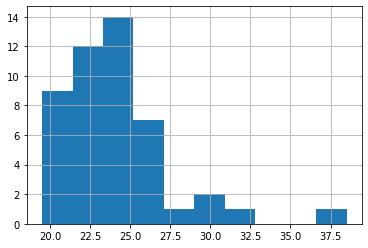

In [49]:
compact = mpg[mpg['class']== 'compact'].mileage_average

len(compact)
# 47 observations using a one sided t test comparing one sampe group to overall population

compact.hist()

<AxesSubplot:>

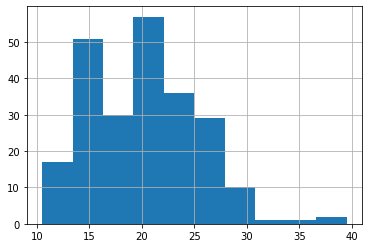

In [50]:
mpg.mileage_average.hist()

Ho -- compact cars have the same or less efficiency vs the average car
Ha -- compact cars have more effeiciency

In [57]:
# I want to make an independent test and remove compact cars from the df and take that average
no_compact = mpg[mpg['class'] != 'compact']
no_c = no_compact['mileage_average']

no_c.head()

16    19.5
17    21.0
18    19.5
19    17.0
20    13.0
Name: mileage_average, dtype: float64

In [58]:
print(compact.var())
print(no_c.var())

12.442876965772433
23.652794548904602


In [59]:
t, p = stats.ttest_ind(compact, no_c, equal_var=False)
t, p / 2


# P/ 2 is smaller than alpha of .05 we reject the null hypothesis

(8.128810422808078, 8.009030328061537e-13)

Do manual cars get better gas mileage than automatic cars?

In [62]:
# Ho - manual cars get less than or equal to average mileage as automatic cars
# Ha - manual cars better gas mileage than automatic cars
manual = mpg[mpg['trans']== 'manual'].mileage_average

manual.head()

Series([], Name: mileage_average, dtype: float64)

In [64]:
auto = mpg[mpg['trans'].str.startswith('a')].mileage_average
manual = mpg[mpg['trans'].str.startswith('m')].mileage_average

print(auto.var())
print(manual.var())

21.942777233382337
26.635167464114826


In [65]:
t, p = stats.ttest_ind(manual, auto, equal_var=False)
t, p / 2

# p value is less than alpha of .05 and we reject the null hypothesis

(4.443514012903071, 8.976124499958965e-06)